In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('C://users//sameer//desktop//datasets//tweet_classification//train.csv')
test = pd.read_csv('C://users//sameer//desktop//datasets//tweet_classification//test.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
train.shape

(7613, 5)

In [4]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Text(0, 0.5, 'samples')

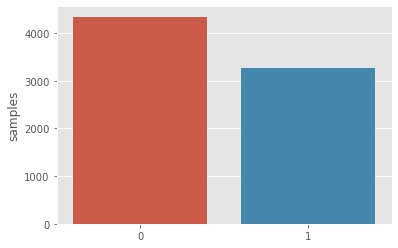

In [5]:
x = train.target.value_counts()
sns.barplot(x.index, x)
plt.gca().set_ylabel('samples')

# Number of characters in the tweets

Text(0.5, 0.98, 'Charactes in tweets')

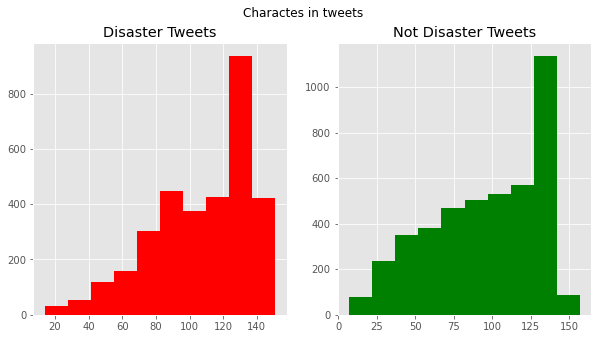

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
tweet_len = train[train['target'] == 1]['text'].str.len()
ax1.hist(tweet_len, color = 'red')
ax1.set_title('Disaster Tweets')
tweet_len = train[train['target'] == 0]['text'].str.len()
ax2.hist(tweet_len, color = 'green')
ax2.set_title('Not Disaster Tweets')
fig.suptitle('Charactes in tweets')

In [7]:
print('Average disaster tweet length ',train[train['target'] == 1]['text'].str.len().mean())
print('Average not disaster tweet length ',train[train['target'] == 0]['text'].str.len().mean())

Average disaster tweet length  108.11342097217977
Average not disaster tweet length  95.70681713496084


# Number of words in the tweet

Text(0.5, 0.98, 'Number of words')

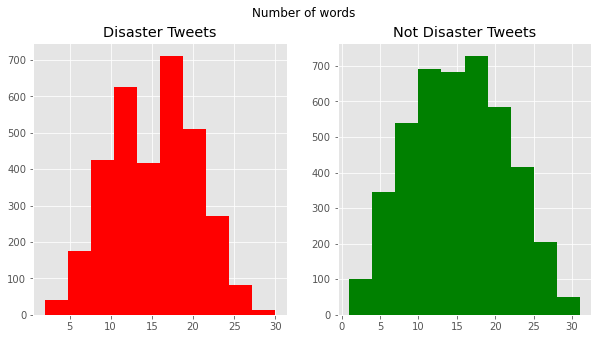

In [8]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))
tweet_len = train[train.target == 1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color = 'red')
ax1.set_title('Disaster Tweets')
tweet_len = train[train.target == 0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len, color = 'green')
ax2.set_title('Not Disaster Tweets')
fig.suptitle('Number of words')

In [9]:
print('Average disaster tweet length in words ',train[train.target == 1]['text'].str.split().map(lambda x: len(x)).mean())
print('Average not disaster tweet length in words ',train[train.target == 0]['text'].str.split().map(lambda x: len(x)).mean())

Average disaster tweet length in words  15.167532864567411
Average not disaster tweet length in words  14.704744357438969


Text(0.5, 0.98, 'Average word length in each tweet')

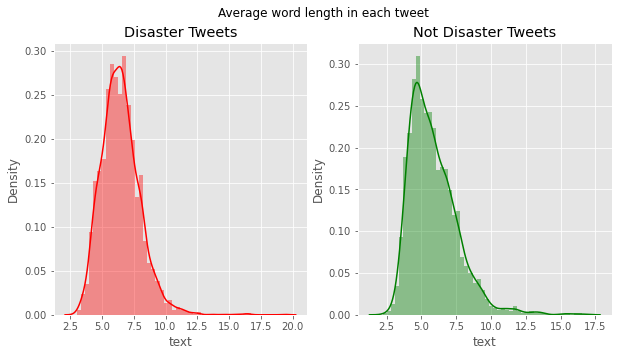

In [10]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
word = train[train.target == 1]['text'].str.split().map(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax = ax1, color = 'red')
ax1.set_title('Disaster Tweets')
word = train[train.target == 0]['text'].str.split().map(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax = ax2, color = 'green')
ax2.set_title('Not Disaster Tweets')
fig.suptitle('Average word length in each tweet')

# Stop words in tweets

In [11]:
# Corpus: collection of written or spoken text
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

In [12]:
# Fuction to determine stopwords in tweets
def create_corpus(target):
    corpus = []
    for x in train[train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [13]:
from collections import defaultdict

In [14]:
corpus = create_corpus(0) # Tweets with target '0'

dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] +=1
top = sorted(dic.items(), key = lambda x:x[1], reverse = True)[:10]

<BarContainer object of 10 artists>

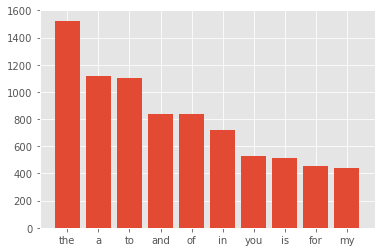

In [15]:
x,y =zip(*top)
plt.bar(x,y)

In [16]:
corpus = create_corpus(1) # Tweets with target '1'

dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] +=1
top = sorted(dic.items(), key = lambda x:x[1], reverse = True)[:10]

<BarContainer object of 10 artists>

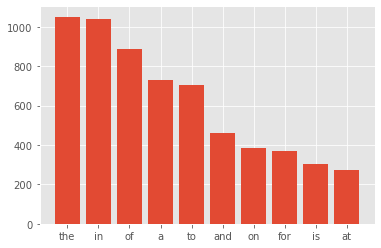

In [17]:
x,y=zip(*top)
plt.bar(x,y)

# Analyzing punctuations

<BarContainer object of 18 artists>

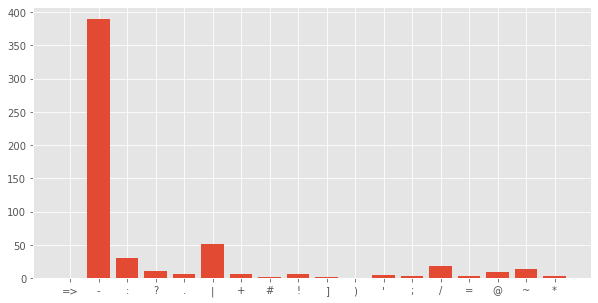

In [18]:
plt.figure(figsize = (10,5))
corpus = create_corpus(1) # For target '1'

dic = defaultdict(int)

import string

special = string.punctuation
for i in corpus:
    if i in special:
        dic[i] += 1
x,y = zip(*dic.items())
plt.bar(x,y)

<BarContainer object of 20 artists>

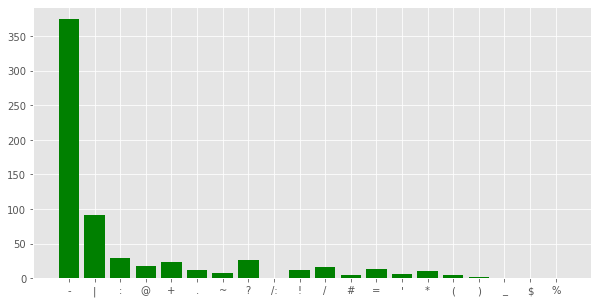

In [19]:
plt.figure(figsize=(10,5))
corpus = create_corpus(0) # For target '0'

dic = defaultdict(int)
special = string.punctuation
for i in corpus:
        if i in special:
            dic[i] += 1
x,y = zip(*dic.items())
plt.bar(x,y, color = 'g')

# Common words in the tweets

In [20]:
from collections import  Counter

In [21]:
counter = Counter(corpus)
most = counter.most_common()
x = []
y = []
for word, count in most[:40]:
    if word not in stop:
        x.append(word)
        y.append(count)

<AxesSubplot:>

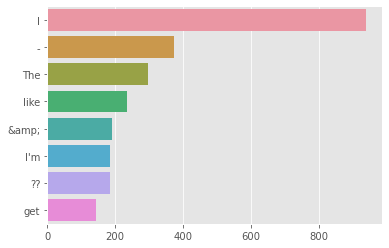

In [22]:
sns.barplot(x=y, y=x)

# Ngram analysis
### bigram (n=2) analysis over the tweets. Checking the most common bigrams in tweets

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
# Function to get proper sequence of words in this case (n=2 words)
def get_top_tweet_bigrams(corpus, n =None):
    vec = CountVectorizer(ngram_range = (2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_of_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_of_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

<AxesSubplot:>

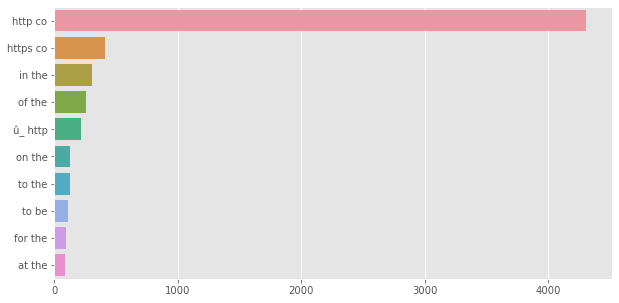

In [25]:
plt.figure(figsize = (10,5))
top_tweet_bigrams = get_top_tweet_bigrams(train['text'])[:10]
x,y = map(list, zip(*top_tweet_bigrams))
sns.barplot(x=y, y=x)

# Data Cleaning

In [26]:
df = pd.concat([train,test])
df.shape

(10876, 5)

In [27]:
# removing urls
import re # regular expression
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [28]:
df['text'] = df['text'].apply(lambda x: remove_url(x))

In [29]:
df['text'].head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [30]:
# removing html tags
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'',text)

In [31]:
df.text = df.text.apply(lambda x: remove_html(x))
df.text.head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [32]:
# removing emojis
# https://stackoverflow.com/a/49146722/330558
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [33]:
df['text'] = df['text'].apply(lambda x: remove_emoji(x))
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0


In [34]:
df.text

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm in RI worse than last hurricane. My city...
3260                    Green Line derailment in Chicago 
3261          MEG issues Hazardous Weather Outlook (HWO) 
3262    #CityofCalgary has activated its Municipal Eme...
Name: text, Length: 10876, dtype: object

In [35]:
# removing punctuations
def remove_punctuations(text):
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)

In [36]:
df['text'] = df['text'].apply(lambda x: remove_punctuations(x))
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1.0
2,5,NaN,NaN,All residents asked to shelter in place are be...,1.0
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1.0
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1.0


In [37]:
# spelling corrections
# !pip install pyspellchecker
from spellchecker import SpellChecker
spell = SpellChecker()

In [38]:
def correct_spelling(text):
    correct_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            correct_text.append(spell.correction(word))
        else:
            correct_text.append(word)
    return ' '.join(correct_text)

In [39]:
df['text'] = df['text'].apply(lambda x: correct_spelling(x))

In [40]:
# Tokenizing the words
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm # to see progress

In [41]:
def create_corpus(df):
    corpus = []
    for tweet in tqdm(df['text']):
        words = [word.lower() for word in word_tokenize(tweet) if
                 ((word.isalpha()==1) & (word not in stop))]
        corpus.append(words)
    return corpus

In [42]:
corpus = create_corpus(df)

100%|██████████████████████████████████████████████████████████████████████████| 10876/10876 [00:04<00:00, 2571.87it/s]


In [43]:
# GloVe pretrained corpus model to represent our words.
# It is available in 3 varieties :50D ,100D and 200 Dimentional
embedding_dict = {} # Importing words and its vectors in a dictionary
with open('C://users//sameer//desktop//datasets//tweet_classification//glove.6B.100d.txt//glove.6B.100d.txt',
          'r',encoding="utf8") as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [44]:
max_len = 50
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences = tokenizer_obj.texts_to_sequences(corpus)

tweet_pad= pad_sequences(sequences, maxlen=max_len, truncating='post',padding='post')

In [45]:
word_index = tokenizer_obj.word_index
print('Number of unique words: ',len(word_index))

Number of unique words:  19844


In [46]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

100%|████████████████████████████████████████████████████████████████████████| 19844/19844 [00:00<00:00, 180388.83it/s]


In [47]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.initializers import Constant
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [48]:
model=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=max_len,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


optimzer=Adam(learning_rate=1e-5)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 100)           1984500   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 100)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                42240     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 2,026,805
Trainable params: 42,305
Non-trainable params: 1,984,500
_________________________________________________________________


In [50]:
training=tweet_pad[:train.shape[0]]
tesingt=tweet_pad[test.shape[0]:]

In [51]:
X_train,X_test,y_train,y_test=train_test_split(training,train['target'].values,test_size=0.15)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_test.shape)

Shape of train (6471, 50)
Shape of Validation  (1142, 50)


In [52]:
history=model.fit(X_train,y_train,batch_size=4,epochs=15,validation_data=(X_test,y_test),verbose=2)

Epoch 1/15
1618/1618 - 80s - loss: 0.6910 - accuracy: 0.5671 - val_loss: 0.6840 - val_accuracy: 0.5823
Epoch 2/15
1618/1618 - 71s - loss: 0.5820 - accuracy: 0.7129 - val_loss: 0.5067 - val_accuracy: 0.7785
Epoch 3/15
1618/1618 - 81s - loss: 0.5363 - accuracy: 0.7439 - val_loss: 0.4904 - val_accuracy: 0.7890
Epoch 4/15
1618/1618 - 88s - loss: 0.5181 - accuracy: 0.7602 - val_loss: 0.4794 - val_accuracy: 0.7951
Epoch 5/15
1618/1618 - 72s - loss: 0.5164 - accuracy: 0.7566 - val_loss: 0.4747 - val_accuracy: 0.8004
Epoch 6/15
1618/1618 - 71s - loss: 0.5086 - accuracy: 0.7656 - val_loss: 0.4701 - val_accuracy: 0.8004
Epoch 7/15
1618/1618 - 82s - loss: 0.5006 - accuracy: 0.7691 - val_loss: 0.4640 - val_accuracy: 0.8082
Epoch 8/15
1618/1618 - 83s - loss: 0.4951 - accuracy: 0.7750 - val_loss: 0.4619 - val_accuracy: 0.8039
Epoch 9/15
1618/1618 - 71s - loss: 0.4859 - accuracy: 0.7816 - val_loss: 0.4625 - val_accuracy: 0.7995
Epoch 10/15
1618/1618 - 72s - loss: 0.4862 - accuracy: 0.7767 - val_loss: